# Homework 1 

## Biya Wu, Sandeep Bangar and Anik Roy

In [2]:
import numpy as np

def generate_data( num_rows , num_features , true_betas , sigma_2=1 , seed = None ) :
    '''
    Args :
    num_rows ( int ): The number of sample rows of data
    num_features ( int ): The number of features
    true_betas (array): The true beta values used to generate y sigma 2 ( float ): The multiplier for the random noise
    '''
    if seed:
          np.random.seed(seed)    
    X = np.random.randn( num_rows , num_features )
    Y = X.dot( true_betas ) + np.random.randn( num_rows ) *sigma_2
    return X , Y

def get_dataset ( set_num ):
    if set_num == 1:
        return generate_data(1000 , 2, np.array([ 1 , 1 ]))
    elif set_num == 2:
        return generate_data(50 , 2 , np.array([1 , 0]))
    elif set_num == 3:
        return generate_data(250,2,np.array([1 , 0]))
    elif set_num == 4:
        return generate_data(100000 , 2,np.array([1 , 0]))
    assert "Should not be here"


In [44]:
# self-defined regression function
import matplotlib.pyplot as plt
%matplotlib inline 
def fit(X,Y,Lambda=0):
    '''
    X,Y are the matrixs to be fitted, the default mode is OLS regression, you can 
    modify Lambda for Ridge Regression
    '''
    return np.linalg.inv(X.T.dot(X)+Lambda*np.identity(X.shape[1])).dot(X.T.dot(Y))

def EDof(X,Y,Lambda=0):
    '''
    Because when the dimension outnumbers 1e5 * 1e5 we may face memory shortage, we
    abandon the traditional way of caculation trace using default numpy method
    '''
    B = np.linalg.inv(X.T.dot(X)+Lambda*np.identity(X.shape[1])).dot(X.T)
    return sum(map(lambda x:(x[0]*x[1]).sum() , zip(X,B.T)))
    

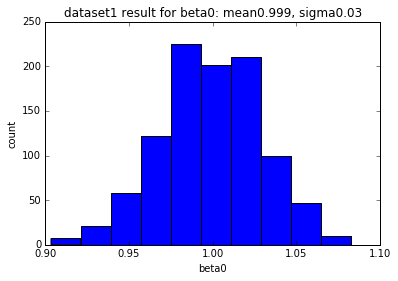

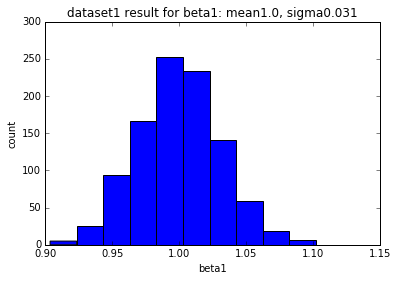

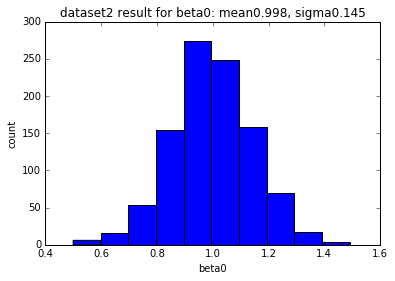

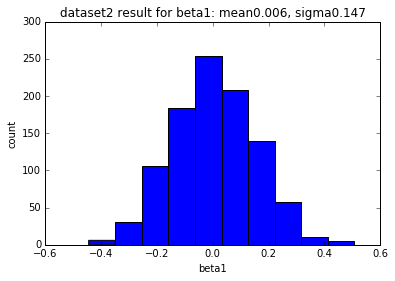

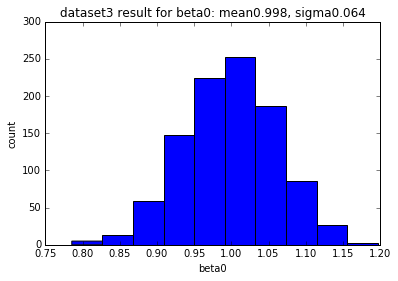

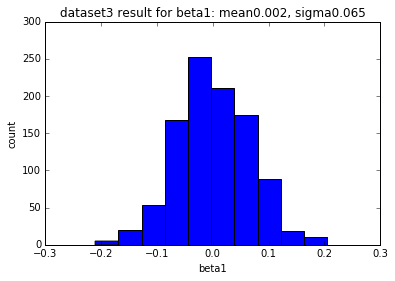

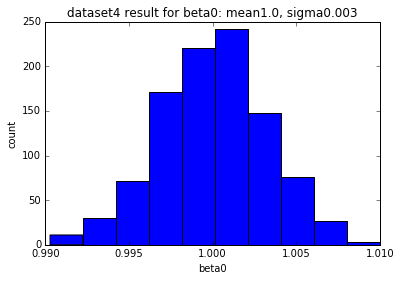

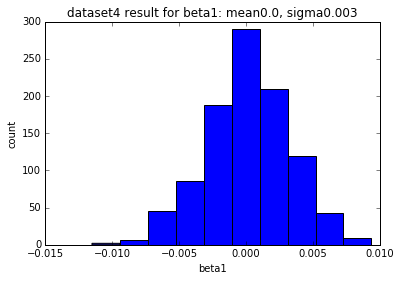

In [106]:
# Q1
for set_id in range(1,5):
    betas = []
    for X,Y in map(get_dataset,[set_id]*1000):
        beta= fit(X,Y)
        betas.append(beta)
    betas = np.array(betas)
    for i in range(2):
        plt.figure()
        beta = betas[:,i]
        plt.hist(beta)
        plt.title('dataset{} result for beta{}: mean{}, sigma{}'.format(set_id,i,round(beta.mean(),3),round(beta.std(),3)))
        plt.xlabel('beta{}'.format(i))
        plt.ylabel('count')    



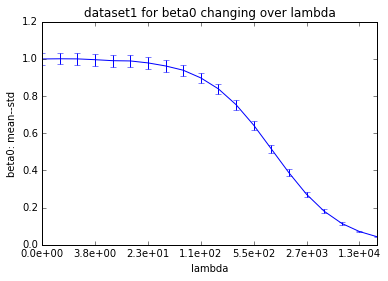

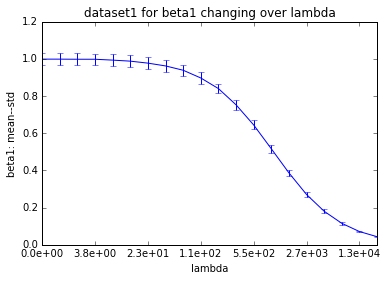

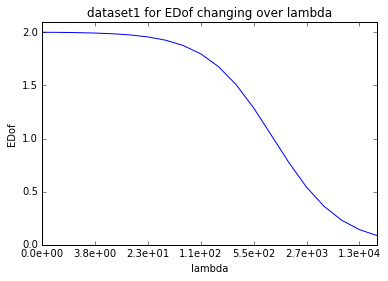

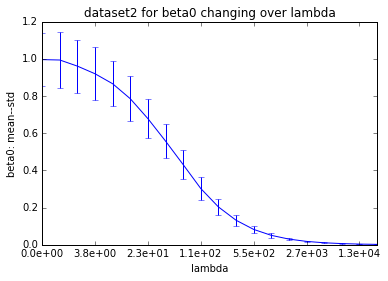

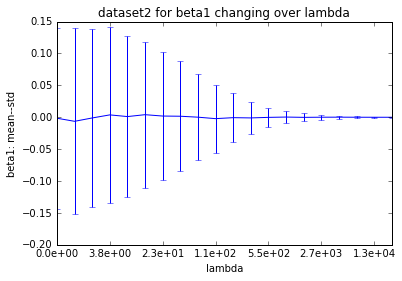

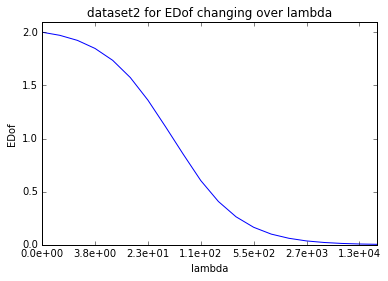

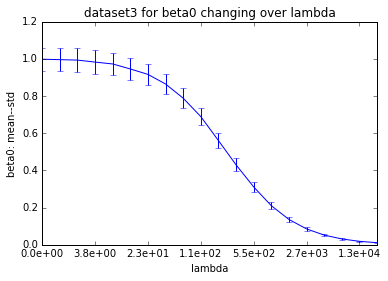

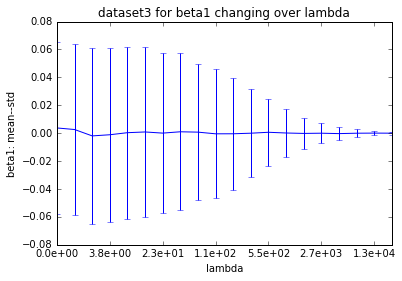

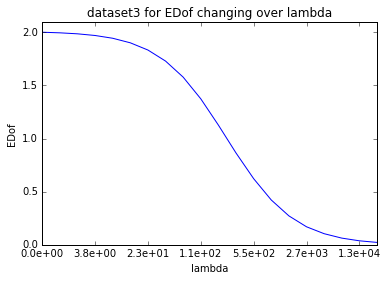

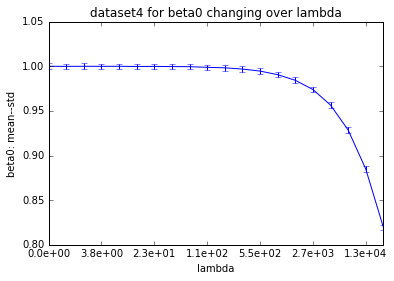

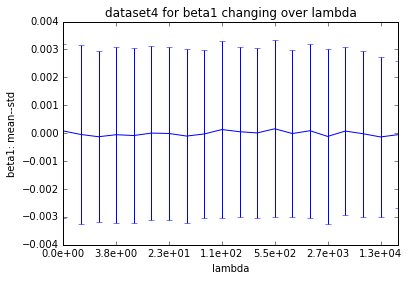

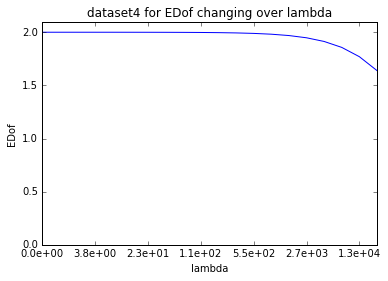

In [144]:
# Q2
Lambdas =np.exp(np.linspace(0, 10, num=20))-1

for set_id in range(1,5):
    beta0 = []
    beta1 = []
    edof = []
    for Lambda in Lambdas:
        betas = []
        edofs = []
        for X,Y in map(get_dataset,[set_id]*1000):
            betas.append(fit(X,Y,Lambda))
            edofs.append(EDof(X,Y,Lambda))
        edof.append(np.mean(edofs))
        betas = np.array(betas)
        beta0.append((betas[:,0].mean(),betas[:,0].std()))
        beta1.append((betas[:,1].mean(),betas[:,1].std()))
        
    plt.figure()
    plt.title('dataset{} for beta0 changing over lambda'.format(set_id))
    plt.xlabel('lambda')
    plt.ylabel('beta0: mean--std')  
    plt.errorbar(np.linspace(0, 10, num=20),[x[0] for x in beta0],yerr=[x[1] for x in beta0])
    plt.xticks(np.linspace(0, 10, num=20)[range(0,20,3)],["%.1e"%x for x in (np.exp(np.linspace(0, 10, num=20))-1)[range(0,20,3)]])

    plt.figure()
    plt.title('dataset{} for beta1 changing over lambda'.format(set_id))
    plt.xlabel('lambda')
    plt.ylabel('beta1: mean--std')  
    plt.errorbar(np.linspace(0, 10, num=20),[x[0] for x in beta1],yerr=[x[1] for x in beta1])
    plt.xticks(np.linspace(0, 10, num=20)[range(0,20,3)],["%.1e"%x for x in (np.exp(np.linspace(0, 10, num=20))-1)[range(0,20,3)]])
    
    plt.figure()
    plt.title('dataset{} for EDof changing over lambda'.format(set_id))
    plt.xlabel('lambda')
    plt.ylabel('EDof')  
    plt.ylim(ymax=2.1)
    plt.plot(np.linspace(0, 10, num=20),edof)
    plt.xticks(np.linspace(0, 10, num=20)[range(0,20,3)],["%.1e"%x for x in (np.exp(np.linspace(0, 10, num=20))-1)[range(0,20,3)]])
   


In [136]:
# Q3
# WLOG, we use OLS as an example
var_beta_theory = []
var_beta_actural = []
for set_id in range(1,5):
    betas = []
    beta_var = []
    for X,Y in map(get_dataset,[set_id]*1000):
        beta= fit(X,Y)
        betas.append(beta)
        beta_var.append(np.linalg.inv(X.T.dot(X)))
    betas = np.array(betas)
    var_beta_theory.append(np.mean(beta_var,0))
    var_beta_actural.append(np.cov(betas.T))
    
for i in range(4):    
    print('theory vars for dataset{}\n'.format(i+1), var_beta_theory[i])
    print('actural vars for dataset{}\n'.format(i+1),var_beta_actural[i])

theory vars for dataset1
 [[  1.00039206e-03   5.45348005e-07]
 [  5.45348005e-07   1.00223543e-03]]
actural vars for dataset1
 [[  1.09825308e-03  -7.12720613e-05]
 [ -7.12720613e-05   1.07394598e-03]]
theory vars for dataset2
 [[  2.15427100e-02   1.73477910e-05]
 [  1.73477910e-05   2.14294232e-02]]
actural vars for dataset2
 [[ 0.02097211  0.0013378 ]
 [ 0.0013378   0.02369222]]
theory vars for dataset3
 [[  4.05272887e-03  -1.30652653e-05]
 [ -1.30652653e-05   4.05582117e-03]]
actural vars for dataset3
 [[ 0.00423024 -0.00010141]
 [-0.00010141  0.00396239]]
theory vars for dataset4
 [[  1.00002425e-05  -7.48122057e-10]
 [ -7.48122057e-10   9.99975664e-06]]
actural vars for dataset4
 [[  9.58340387e-06   5.48618875e-07]
 [  5.48618875e-07   1.02752780e-05]]


There are minor difference between theoratical outcome and realized ones, bacause simulation has margin error itself